In [1]:
import dask.dataframe as dk

In [3]:
df = dk.read_csv("data_analysis.csv", assume_missing=True)

In [4]:
df.head()

,ID,Name,Age,Gender,Income,City,Purchase_Amount,Is_Member,Signup_Date
0,1.0,Person_1,56.0,Male,49034.33,Los Angeles,811.76,1.0,2020-02-10
1,2.0,Person_2,46.0,Female,55173.54,New York,1289.13,1.0,2022-01-09
2,3.0,Person_3,32.0,Male,48798.69,New York,1055.96,0.0,2024-09-23
3,4.0,Person_4,25.0,Other,46379.30,New York,1727.33,0.0,2021-05-16
4,5.0,Person_5,38.0,Other,71502.73,Chicago,1351.52,0.0,2022-08-16


In [5]:
print(df.dtypes)

ID                         float64
Name               string[pyarrow]
Age                        float64
Gender             string[pyarrow]
Income                     float64
City               string[pyarrow]
Purchase_Amount            float64
Is_Member                  float64
Signup_Date        string[pyarrow]
dtype: object


In [6]:
print("Row count:", df.shape[0].compute())

Row count: 100


In [7]:
print (df.columns)

Index(['ID', 'Name', 'Age', 'Gender', 'Income', 'City', 'Purchase_Amount',
       'Is_Member', 'Signup_Date'],
      dtype='object')


In [8]:
df['ID'].value_counts() # count how many ID

Dask Series Structure:
npartitions=1
    int64
      ...
Name: count, dtype: int64
Dask Name: value-counts-agg, 5 graph layers

In [10]:
df['Gender'].value_counts().compute() #how many male, female, and others

Gender
Other     37
Male      36
Female    27
Name: count, dtype: int64[pyarrow]

In [17]:
avg_income_by_gender = df.groupby('Gender')['Income'].mean().compute()
print(avg_income_by_gender) #average income by gender 

Gender
Female    49957.452222
Male      48169.763056
Other     52834.087027
Name: Income, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

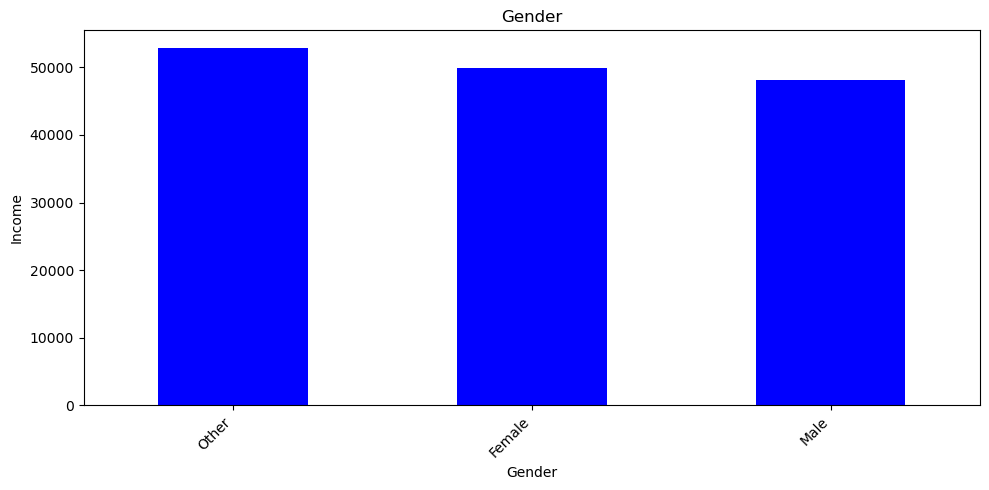

In [22]:
avg_income_by_gender = df.groupby('Gender')['Income'].mean().compute().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_income_by_gender.plot(kind='bar', color='blue')
plt.title('Gender')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # barchart for Income by gender